# Plot

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os
import pylhe, gzip, tempfile
from getInfoFromBanner import getInfo
from scipy.interpolate import griddata
from matplotlib.colors import LogNorm
import itertools

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disabpd.option_context('display.max_columns', 300)le copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
def Cg(mChi,mST,yDM,gs,MT):
    
    c = -MT*gs*yDM**2/(384*np.pi**2)
    if 1-mChi**2/mST**2 < 0.1:
        r = mChi**2/(5*mST**4)-4*mChi/(5*mST**3) + 11/(10*mST**2)
    else:
        r = mST**6/mChi**6 
        r += 2*(1 - (3*mST**4)/mChi**4) 
        r += 3*mST**2*(1 + 4*np.log(mST/mChi))/mChi**2
        r = r/(mChi**2*(1 - mST**2/mChi**2)**4)
    
    return c*r
               
def Cq(mChi,mST,yDM,gs,MT):
    
    c = 6*gs**2*yDM**2/(3456*np.pi**2)
    if 1-mChi**2/mST**2 < 0.1:
        r = mChi**2/(10*mST**4)-4*mChi/(5*mST**3)+11/(5*mST**2)
    else:
        r = 6*(mChi**2/mST**2)*np.log(mChi**2/mST**2)
        r += -11*mChi**2/mST**2 
        r += 18
        r += -9*mST**2/mChi**2 
        r += 2*mST**4/mChi**4
        r = r*mST**2*mChi**4/((mChi**2-mST**2)**4)
    
    return c*r               

In [3]:
gs = np.sqrt(1.63362817)
MT=172.5
yDM=1.0
mChi=550.
mST=600.

### Cg

In [4]:
mSTv = np.linspace(500.,2500.,100)
mChiv = np.linspace(500.,2500.,100)

In [5]:
pts = []
for mmst,mmchi in itertools.product(mSTv,mChiv):
    pts.append([mmst,mmchi,Cg(mmchi,mmst,yDM,gs,MT),Cq(mmchi,mmst,yDM,gs,MT)])
pts = np.array(pts)

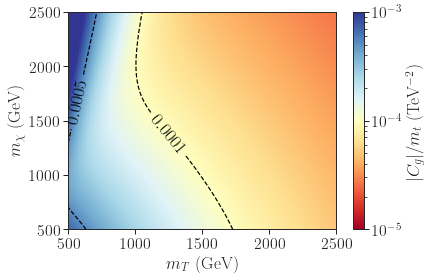

In [40]:
plt.figure(figsize=(6,4))
x = mSTv
y = mChiv
z = (np.abs(pts[:,2])/MT)*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-5,vmax=1e-3))
plt.colorbar(label=r'$|C_{g}|/m_t$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$m_{\chi}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, [1e-4,5e-4], colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.xlim(500,2500)
plt.show()

### Cq

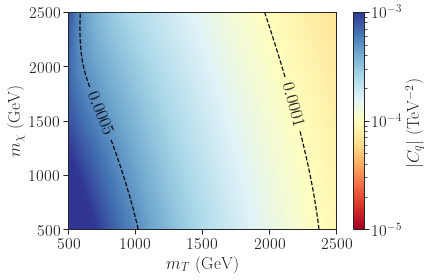

In [39]:
plt.figure(figsize=(6,4))
x = mSTv
y = mChiv
z = np.abs(pts[:,3])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-5,vmax=1e-3))
plt.colorbar(label=r'$|C_{q}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$m_{\chi}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, [1e-4,5e-4], colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.xlim(500,2500)
plt.show()

### Cg/Cq

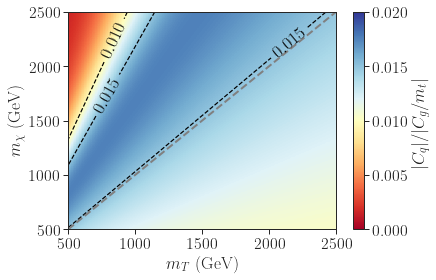

In [71]:
plt.figure(figsize=(6,4))
x = mSTv
y = mChiv
z = np.abs(pts[:,3]/pts[:,2]) # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',vmin=0.,vmax=0.02)
plt.colorbar(label=r'$|C_{q}|/|C_{g}/m_t|$')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$m_{\chi}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, [0.01,0.015], colors='black',linestyles='dashed')
plt.axline((500.,500.),(2000.,2000.),color='gray',linestyle='dashed',linewidth=2.0)
plt.clabel(contours, inline=True, fontsize=18)
plt.xlim(500,2500)
plt.show()